In [1]:
import numpy as np;
import pandas as pd;

import matplotlib.pyplot as plt;

In [2]:
# regression
# pred = mx + b
# m, b are weights
# error => mean((y - pred) ** 2)
# error_derivative
# dE / dpred = 2 * (y - ypred) = (y - ypred) ## 2 is a constant so it can be discarded
# dpred / dm = x
# dpred / dx = m
# dpred / db = 1
# dE / dm = dE / dpred * dpred / dm = (y - pred) * x
# dE / db = dE / dpred * dpred / db = (y - pred)
# dE / dx = dE / dpred * dpred / dx = (y - pred) * m

In [55]:
class LinearRegression:
    def __init__(self, inputs):
        # for always producing the same results
        np.random.seed(42);
        self.x = inputs;
        self.m = np.random.randn();
        self.b = np.random.randn();
        self.grad = {};
    
    def forward(self, x=None):
        output = None;
        if x is None:
            output = (self.m * self.x) + self.b;
        else:
            output = (self.m * x) + self.b;
        
        self.output = output;
        
        return output;
    
    def error(self, y):
        err = (self.output - y) ** 2;
        err = np.mean(err);
        
        return err;
    
    def error_derivative(self, y):
        dE_dm = 1 * (self.output - y) * self.x;
        dE_dm = np.mean(dE_dm);
        
        dE_db = 1 * (self.output - y);
        dE_db = np.mean(dE_db);
        
        self.grad['db'] = dE_db;
        self.grad['dm'] = dE_dm;
        
        return self.grad;
    
    def train(self, y, epochs, lr=0.0001, showgraph=False):
        for i in range(epochs):
            self.output = self.forward();
            err = self.error(y);
            derv = self.error_derivative(y);
            self.m = self.m - (lr * derv['dm']);
            self.b = self.b - (lr * derv['db']);
            
            if showgraph:
                plt.scatter(self.x, y, color='r');
                plt.scatter(self.x, self.output, color='g');
                plt.show();
        
        return err;

In [64]:
data = pd.read_csv('data.csv', header=None, names=['X', 'y']);

In [65]:
X = data['X'].values;
y = data['y'].values;

m = 0;
c = 0;

L = 0.001;
epochs = 1000;

n = float(len(X));

for i in range(len(X)):
    y_pred = m * X + c;
    d_m = (-2 / n) * np.sum(X * (y_pred - y));
    d_c = (-2 / n) * np.sum(y_pred - y);
    
    m = m - L * d_m;
    c = c - L * d_c;

print(m, c);

-7.37891066403305e+77 -1.4503024083346106e+76


In [67]:
from sklearn.model_selection import train_test_split;

In [68]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0);

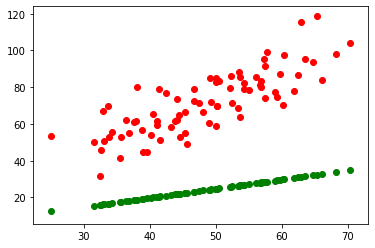

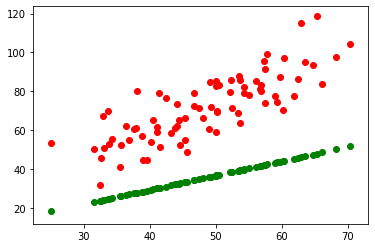

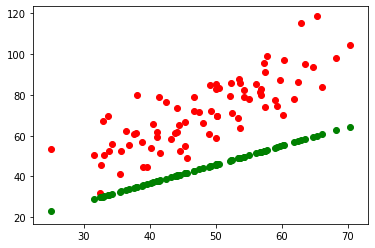

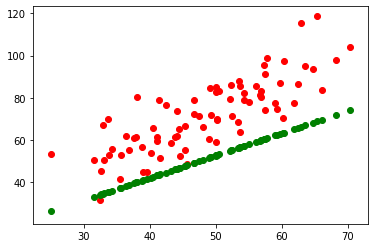

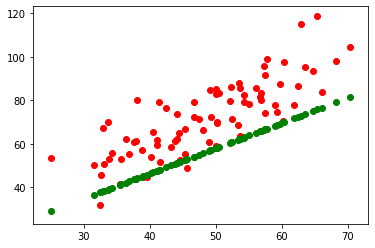

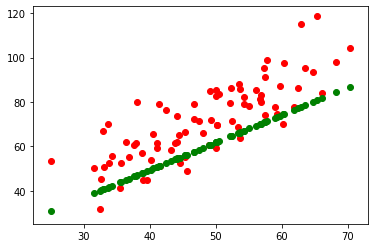

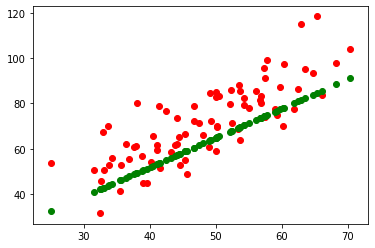

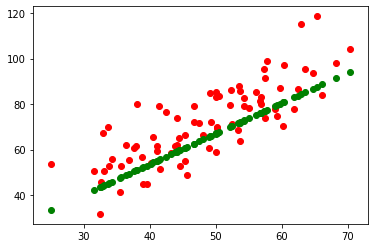

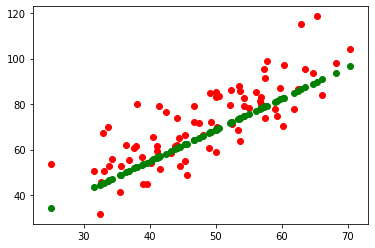

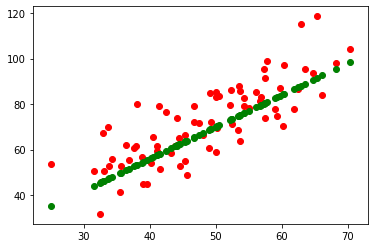

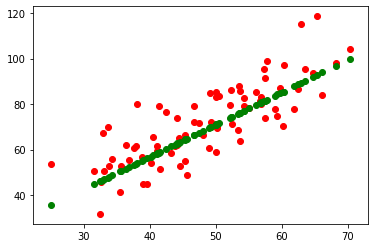

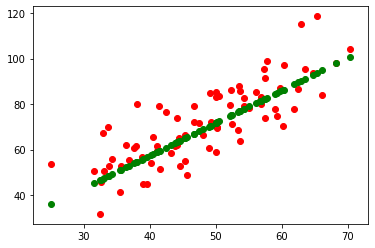

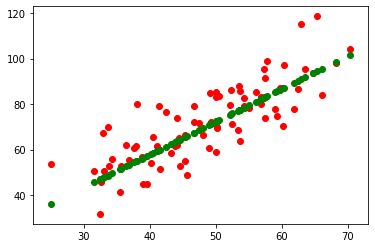

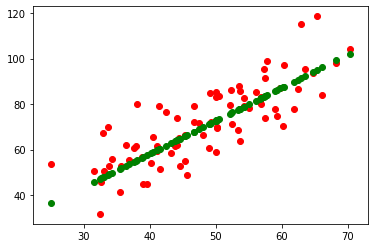

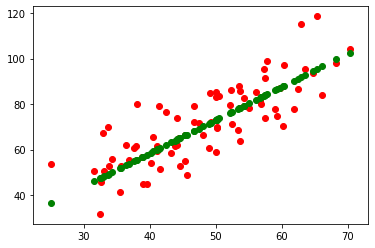

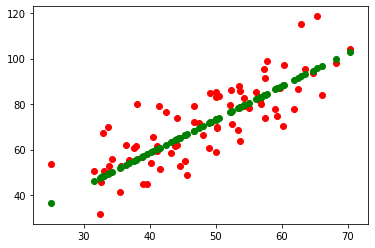

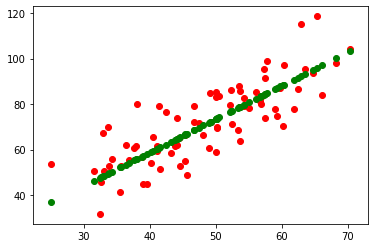

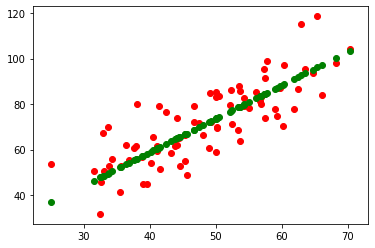

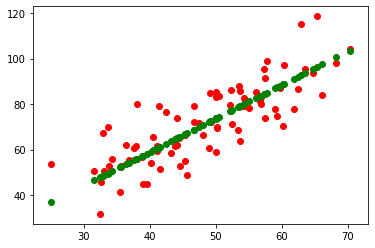

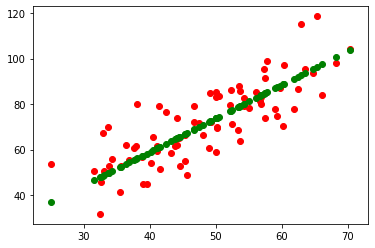

In [69]:
lreg = LinearRegression(inputs=x_train);

lreg.train(y_train, epochs=20, showgraph=True);

In [73]:
y_pred = lreg.forward(x_test);
print(y_pred);

[ 84.48484278  75.30075505  90.71508554  81.19001873  65.56369784
  68.1295607   65.85059022  63.51905722  75.30062925  73.73809114
  61.4713044  101.39621423  82.26418392  85.75214377  57.89717322
  76.97669154  69.97521412  76.41747949  85.74634126  70.89613948]


In [71]:
import matplotlib.pyplot as plt;

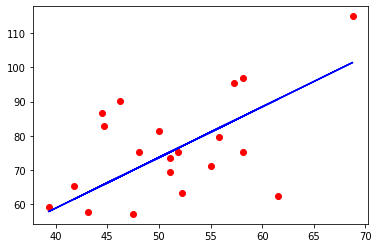

In [79]:
plt.scatter(x_test, y_test, color='r');
plt.plot(x_test, y_pred, color='b');

plt.show();